In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn. feature_extraction. text import TfidfTransformer
from sklearn. feature_extraction. text import TfidfVectorizer
from sklearn. feature_extraction. text import CountVectorizer
from sklearn. metrics import confusion_matrix
from sklearn import metrics
from sklearn. metrics import roc_curve, auc
from nltk. stem. porter import PorterStemmer
import re
import string
from nltk. corpus import stopwords
from nltk. stem import PorterStemmer
from nltk. stem. wordnet import WordNetLemmatizer
from gensim. models import Word2Vec
from gensim. models import KeyedVectors
import pickle
import scipy as sp
from tqdm import tqdm
import os
from sklearn. cross_validation import train_test_split
from sklearn. neighbors import KNeighborsClassifier
from sklearn. metrics import accuracy_score
from sklearn. cross_validation import cross_val_score
from collections import Counter
from sklearn. metrics import accuracy_score
from sklearn import cross_validation
from sklearn. metrics import confusion_matrix
from sklearn. preprocessing import normalize
from sklearn import datasets, neighbors
from sklearn. metrics import roc_auc_score
from sklearn. preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

with open("C:/Python/Assignments/Preprocessing/final_sorted.txt", "rb") as file:
    sorted_data = pickle.load(file)




C:\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# [5] Assignment 10: K-Means, Agglomerative & DBSCAN Clustering

<ol>
    <li><strong>Apply K-means Clustering on these feature sets:</strong>
        <ul>
    <li><font color='red'>SET 1:</font>Review text, preprocessed one converted into vectors using (BOW)</li>
            <li><font color='red'>SET 2:</font>Review text, preprocessed one converted into vectors using (TFIDF)</li>
            <li><font color='red'>SET 3:</font>Review text, preprocessed one converted into vectors using (AVG W2v)</li>
            <li><font color='red'>SET 4:</font>Review text, preprocessed one converted into vectors using (TFIDF W2v)</li>
    <li>Find the best ‘k’ using the elbow-knee method (plot k vs inertia_)</li>
    <li>Once after you find the k clusters, plot the word cloud per each cluster so that at a single
go we can analyze the words in a cluster.</li>          
        </ul>
    </li>
    <br>
    <li><strong>Apply Agglomerative Clustering on these feature sets:</strong>
        <ul>
            <li><font color='red'>SET 3:</font>Review text, preprocessed one converted into vectors using (AVG W2v)</li>
            <li><font color='red'>SET 4:</font>Review text, preprocessed one converted into vectors using (TFIDF W2v)</li>
    <li>Apply agglomerative algorithm and try a different number of clusters like 2,5 etc.</li>
    <li>Same as that of K-means, plot word clouds for each cluster and summarize in your own words what that cluster is representing.</li>
            <li>You can take around 5000 reviews or so(as this is very computationally expensive one)</li>
        </ul>
    </li>
    <br>
    <br>
    <li><strong>Apply DBSCAN Clustering on these feature sets:</strong>
        <ul>
            <li><font color='red'>SET 3:</font>Review text, preprocessed one converted into vectors using (AVG W2v)</li>
            <li><font color='red'>SET 4:</font>Review text, preprocessed one converted into vectors using (TFIDF W2v)</li>
    <li>Find the best ‘Eps’ using the <a href='https://stackoverflow.com/questions/12893492/choosing-eps-and-minpts-for-dbscan-r/48558030#48558030'>elbow-knee method.</a></li>
    <li>Same as before, plot word clouds for each cluster and summarize in your own words what that cluster is representing.</li>
            <li>You can take around 5000 reviews for this as well.</li>
        </ul>
    </li>
</ol>

## [5.1] K-Means Clustering

### [5.1.1] Applying K-Means Clustering on BOW,<font color='red'> SET 1</font>

In [4]:
data = sorted_data[:50000]
X = data['Text_new'].values
count_vect = CountVectorizer(min_df=10, max_features=500)  #in scikit-learn
data_1 = count_vect.fit_transform(X)

In [3]:
print("the type of count vectorizer :",type(data_1))
print("the shape of out text BOW vectorizer : ",data_1.get_shape())
print("the number of unique words :", data_1.get_shape()[1])

the type of count vectorizer : <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer :  (50000, 500)
the number of unique words : 500


In [6]:
k_values = [2,3,4,5,6,7,8,9,10]
inertia = []
for k in tqdm(k_values):
    kmeans = KMeans(n_clusters=k).fit(data_1)
    inertia.append(kmeans.inertia_)
    

100%|█████████████████████████████████████████| 9/9 [1:24:43<00:00, 654.50s/it]


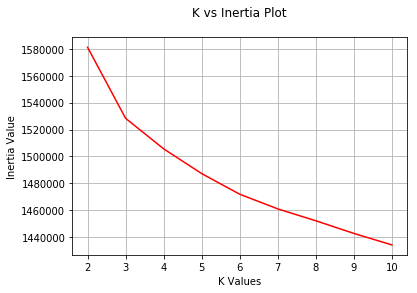

In [9]:
plt.plot(k_values,inertia,'r')
plt.grid(True)
plt.title("K vs Inertia Plot\n")
#plt.ylim(0,2058810978)
plt.xlabel("K Values")
plt.ylabel("Inertia Value")
plt.show();

In [13]:
opt_k = 6
kmeans = KMeans(n_clusters=opt_k).fit(data_1)

In [37]:
clust = [ [] for i in range(opt_k) ]  # this is the list of clusters
for i in range(kmeans.labels_.shape[0]):
    clust[kmeans.labels_[i]].append(X[i])

#### [5.1.2] Wordclouds of clusters obtained after applying k-means on BOW<font color='red'> SET 1</font>

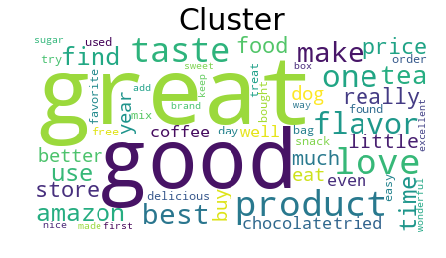

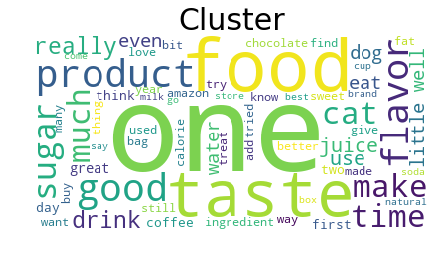

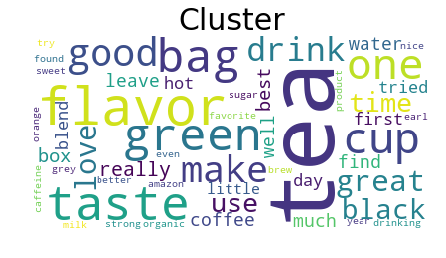

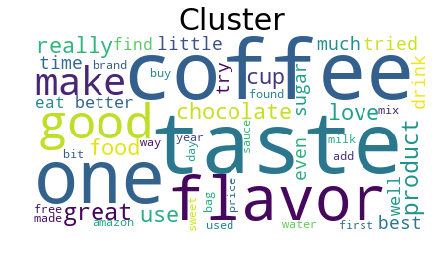

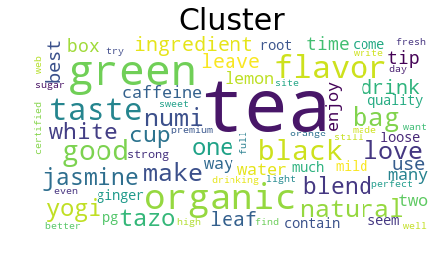

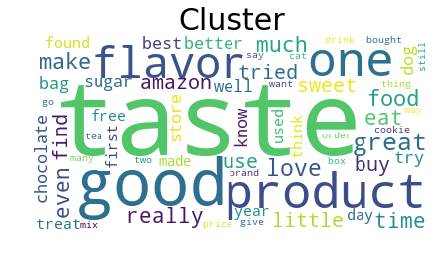

In [47]:
from wordcloud import WordCloud
# https://www.geeksforgeeks.org/generating-word-cloud-python/
def cloud(cluster):
    wordcloud = WordCloud(collocations=False, background_color ='white', 
                    min_font_size = 10).generate(str(list(cluster)))
    plt.figure(figsize = (6,6), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title("Cluster",size= 30,)
    plt.show() 
for cl in clust:
    cloud(cl)

**Observation:**
The clusters are about,
1. (Great, Good, Product) : This cluster is about product related words.
2. (Food, Sugar, Juice, Drink) : This cluster is about drink related words.
3. (Tea, Green tea, Tea bag) : This cluster is about tea related words.
4. (Coffee, Cup, Espresso,Flavour) : This cluster is about coffee related words.
5. (Tea, Green tea, Jasmine Tea) : This cluster is about tea related words.
6. (Flavour, taste, Good Product),  : This cluster is about flavour related words.

### [5.1.3] Applying K-Means Clustering on TFIDF,<font color='red'> SET 2</font>

the type of count vectorizer : <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer :  (50000, 298)
the number of unique words : 298


100%|█████████████████████████████████████████| 9/9 [1:29:22<00:00, 497.66s/it]


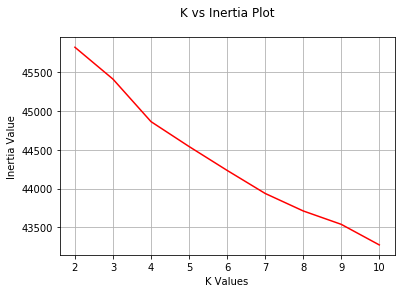

In [4]:
# Please write all the code with proper documentation
tf_idf_vect = TfidfVectorizer(min_df=1000)
data_2 = tf_idf_vect.fit_transform(X)
print("the type of count vectorizer :",type(data_2))
print("the shape of out text TFIDF vectorizer : ",data_2.get_shape())
print("the number of unique words :", data_2.get_shape()[1])

k_values = [2,3,4,5,6,7,8,9,10]
inertia2 = []
for k in tqdm(k_values):
    kmeans = KMeans(n_clusters=k,n_jobs=-1).fit(data_2)
    inertia2.append(kmeans.inertia_)
    
plt.plot(k_values,inertia2,'r')
plt.grid(True)
plt.title("K vs Inertia Plot\n")
plt.xlabel("K Values")
plt.ylabel("Inertia Value")
plt.show();

#### [5.1.4] Wordclouds of clusters obtained after applying k-means on TFIDF<font color='red'> SET 2</font>

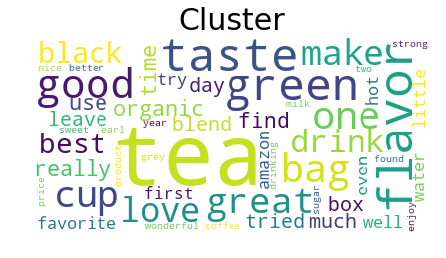

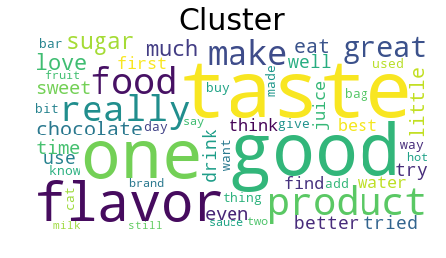

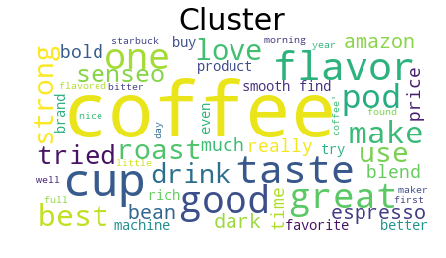

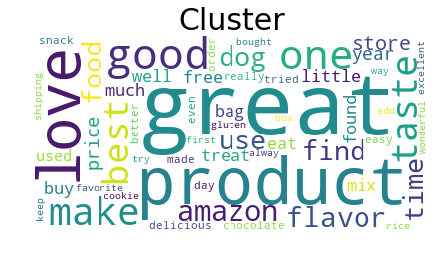

In [53]:
# Please write all the code with proper documentation
opt_k = 4
kmeans = KMeans(n_clusters=opt_k).fit(data_2)
clust1 = [ [] for i in range(opt_k) ]  # this is the list of clusters
for i in range(kmeans.labels_.shape[0]):
    clust1[kmeans.labels_[i]].append(X[i])
for cl in clust1:
    cloud(cl)

**Observation:**
The clusters are about,
1. (Tea, Green tea, Black Tea) : This cluster is about tea related words.
2. (Taste, One, Good, Flavor) : This cluster is about flavour related words.
3. (Coffee, Cup, Espresso,Flavour) : This cluster is about coffee related words.
4. (Shipping, Great Product, Best Price) : This cluster is about services of amazon related words.

### [5.1.5] Applying K-Means Clustering on AVG W2V,<font color='red'> SET 3</font>

In [3]:
# Please write all the code with proper documentation
# List of sentence in X_train text
sent_x = []
for sent in X :
    sent_x.append(sent.split())
  
    
# Train your own Word2Vec model using your own train text corpus 
# min_count = 5 considers only words that occured atleast 5 times
w2v_model=Word2Vec(sent_x,min_count=5,size=50, workers=4)

w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))

# compute average word2vec for each review for sent_x .
train_vectors = []; 
for sent in sent_x:
    sent_vec = np.zeros(50) 
    cnt_words =0; 
    for word in sent: # 
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    train_vectors.append(sent_vec)
    
data_3 = train_vectors    

number of words that occured minimum 5 times  13694


100%|████████████████████████████████████████████| 9/9 [00:51<00:00,  7.24s/it]


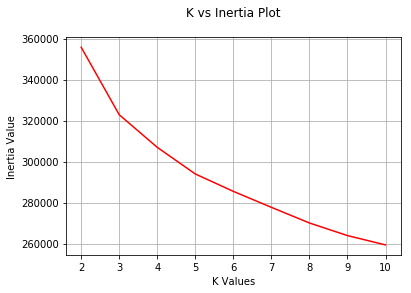

In [6]:
k_values = [2,3,4,5,6,7,8,9,10]
inertia3 = []
for k in tqdm(k_values):
    kmeans = KMeans(n_clusters=k,n_jobs=-1).fit(data_3)
    inertia3.append(kmeans.inertia_)
    
plt.plot(k_values,inertia3,'r')
plt.grid(True)
plt.title("K vs Inertia Plot\n")
plt.xlabel("K Values")
plt.ylabel("Inertia Value")
plt.show();

#### [5.1.6] Wordclouds of clusters obtained after applying k-means on AVG W2V<font color='red'> SET 3</font>

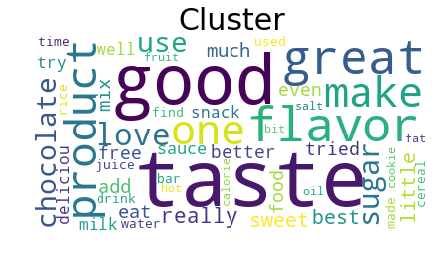

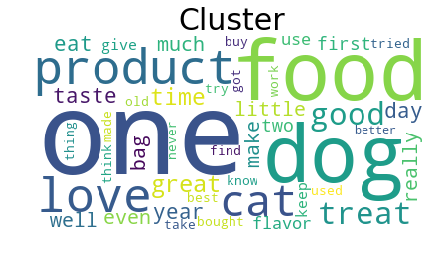

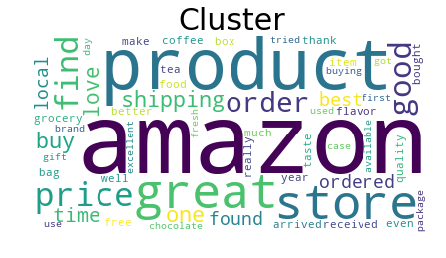

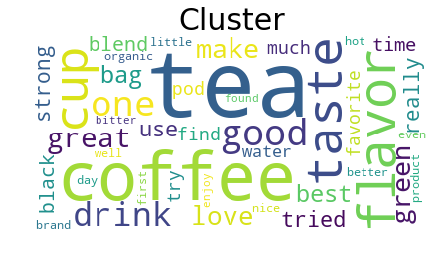

In [54]:
# Please write all the code with proper documentation
opt_k = 4
kmeans = KMeans(n_clusters=opt_k).fit(data_3)
clust2 = [ [] for i in range(opt_k) ]  # this is the list of clusters
for i in range(kmeans.labels_.shape[0]):
    clust2[kmeans.labels_[i]].append(X[i])
for cl in clust2:
    cloud(cl)

**Observation:**
The clusters are about,
1. (Chocolate, Taste, Sugar) : This cluster is about chocolate related words.
2. (Dog food, Cat food) : This cluster is about pet food related words.
3. (Shipping, Product, Amazon, Order) : This cluster is about amazon services related words.
4. (Coffee, Tea, Flavour) : This cluster is about tea, coffee related words.

### [5.1.7] Applying K-Means Clustering on TFIDF W2V,<font color='red'> SET 4</font>

In [ ]:
data = sorted_data[:50000]
X = data['Text_new'].values
model = TfidfVectorizer()
model.fit(X)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in (sent_x): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1
data_4=tfidf_sent_vectors

100%|████████████████████████████████████████████| 9/9 [00:52<00:00,  7.10s/it]


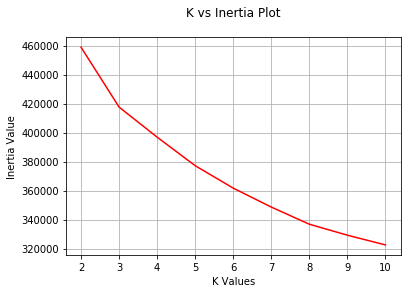

In [11]:
k_values = [2,3,4,5,6,7,8,9,10]
inertia4 = []
for k in tqdm(k_values):
    kmeans = KMeans(n_clusters=k,n_jobs=-1).fit(data_4)
    inertia4.append(kmeans.inertia_)
    
plt.plot(k_values,inertia4,'r')
plt.grid(True)
plt.title("K vs Inertia Plot\n")
plt.xlabel("K Values")
plt.ylabel("Inertia Value")
plt.show();

#### [5.1.8] Wordclouds of clusters obtained after applying k-means on TFIDF W2V<font color='red'> SET 4</font>

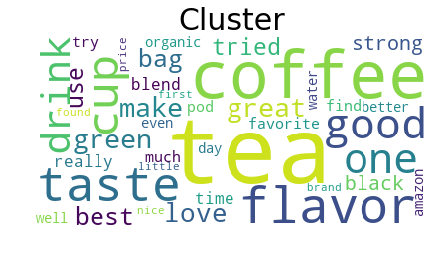

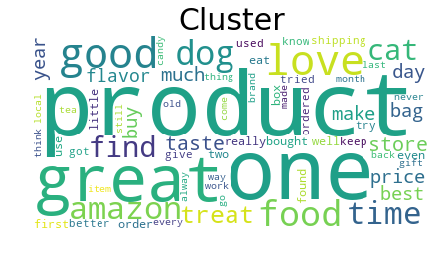

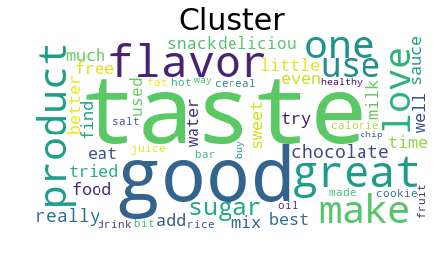

In [55]:
# Please write all the code with proper documentation
opt_k = 3
kmeans = KMeans(n_clusters=opt_k).fit(data_4)
clust3 = [ [] for i in range(opt_k) ]  # this is the list of clusters
for i in range(kmeans.labels_.shape[0]):
    clust3[kmeans.labels_[i]].append(X[i])
for cl in clust3:
    cloud(cl)

**Observation:**
The clusters are about,
1. (Coffee, Tea, Flavour) : This cluster is about tea, coffee related words.
2. (Dog food, Cat food) : This cluster is about pet food related words.
3. (Chocolate, Taste, Sugar)   : This cluster is about chocolate, sugarrelated words.


# [6] Conclusions

In [6]:
# Please compare all your models using Prettytable library
from prettytable import from_csv
with open("table.csv", "r") as fp: 
    x = from_csv(fp)
    
print(x)

+------------+----------------+
| Vectorizer | No of Clusters |
+------------+----------------+
|    BOW     |       6        |
|   TFIDF    |       4        |
|  AVG W2V   |       4        |
| TFIDF W2V  |       3        |
+------------+----------------+
